# **Title:PREDICTION OF STUDENT PERFORMANCE**

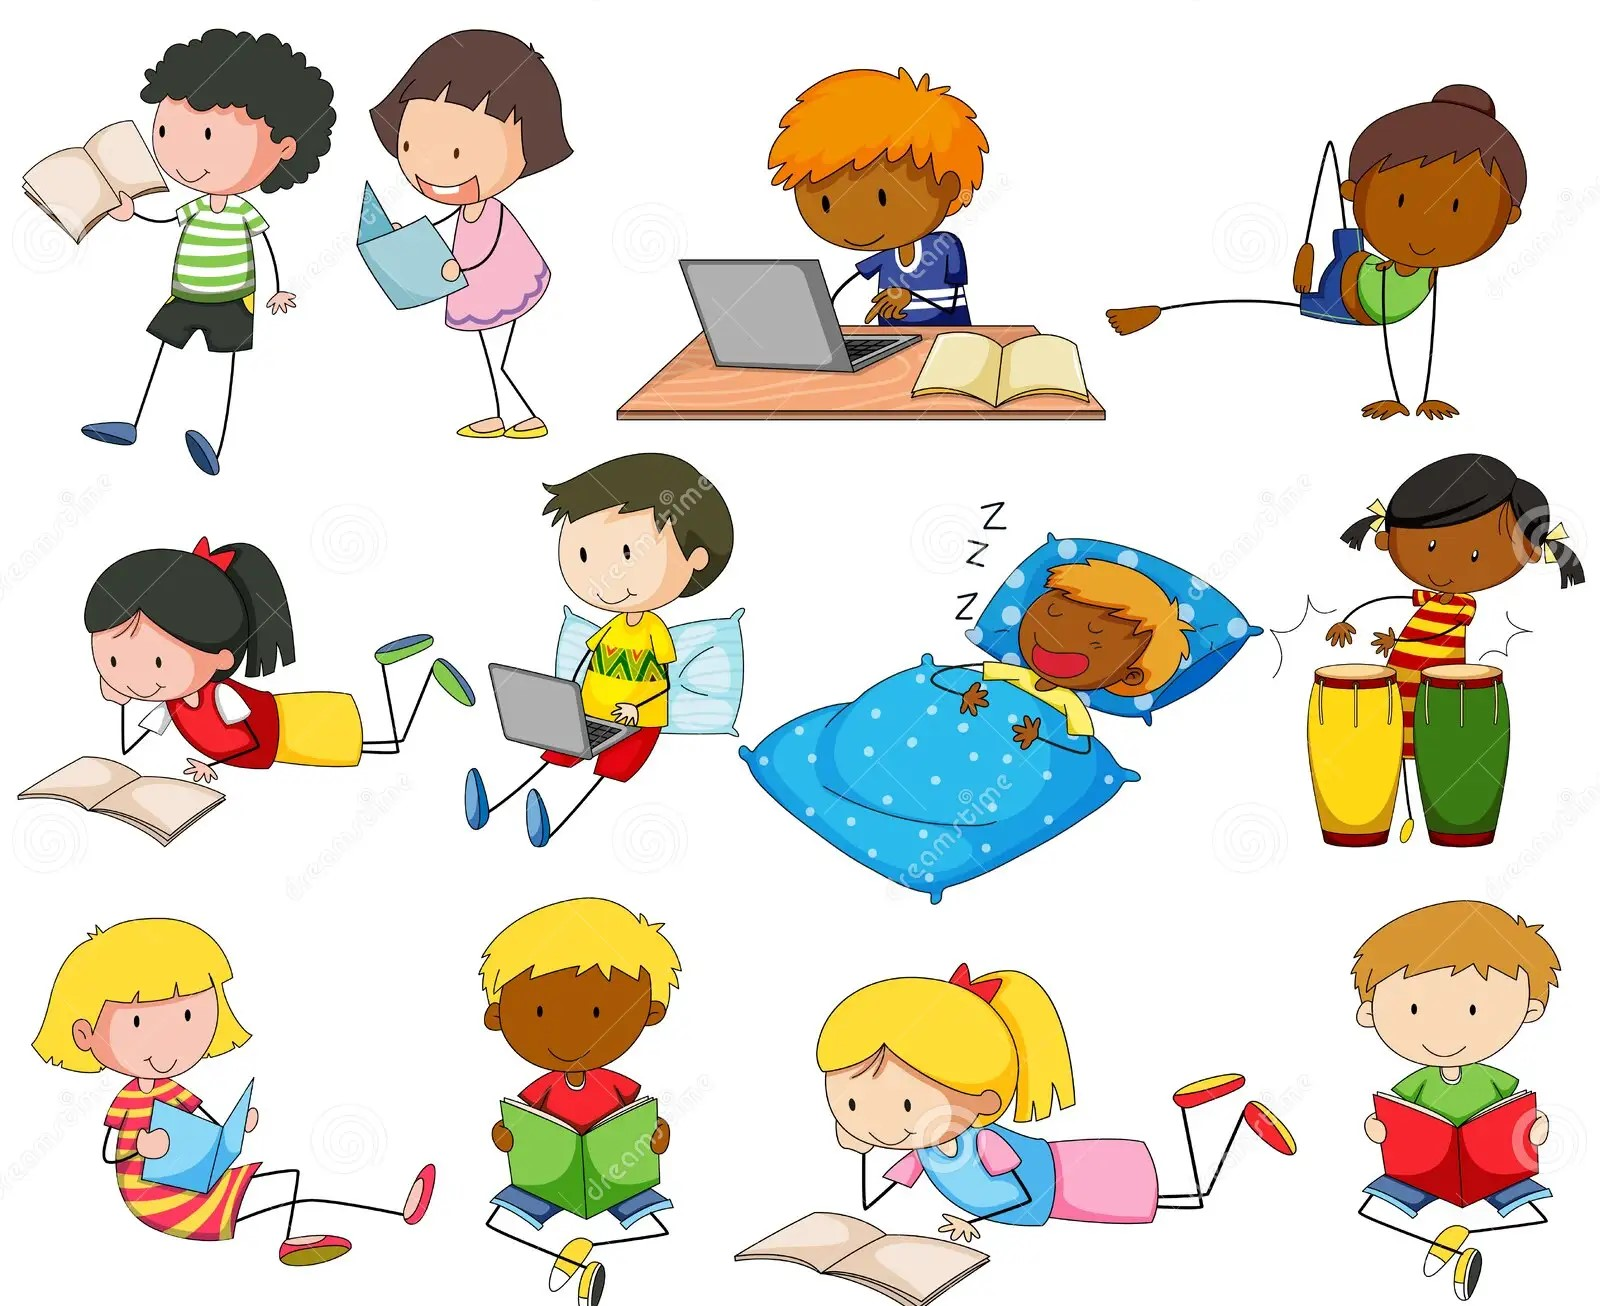

### **INTRODUCTION:**
Education plays a pivotal role in shaping the future of individuals and societies alike. To gain insights into the factors influencing student performance and to enhance our understanding of academic achievements, a dataset titled "Student_Performance.csv" has been compiled and is the subject of analysis. This dataset encapsulates a wealth of information related to student performance, potentially encompassing a diverse range of attributes and metrics that contribute to scholastic success

## Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [ ]:
df=pd.read_csv('/content/Student_Performance.csv')

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


# Dataset Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

# *Converting Object column to Integer column*

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Sample categorical data
categories = ['Yes', 'No']

# Fit the label encoder on the categorical data
label_encoder.fit(categories)

# Transform the categorical data into numerical labels
numeric_labels = label_encoder.fit_transform(categories)

print("Original categories:", categories)
print("Numeric labels:", numeric_labels)
df['Numeric labels']= label_encoder.fit_transform(df['Extracurricular Activities'])
df['Extracurricular Activities']= label_encoder.fit_transform(df['Numeric labels'])

Original categories: ['Yes', 'No']
Numeric labels: [1 0]


In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Numeric labels
0,7,99,1,9,1,91.0,1
1,4,82,0,4,2,65.0,0
2,8,51,1,7,2,45.0,1
3,5,52,1,5,2,36.0,1
4,7,75,0,8,5,66.0,0
...,...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0,1
9996,7,64,1,8,5,58.0,1
9997,6,83,1,8,5,74.0,1
9998,9,97,1,7,0,95.0,1


 Performance Prediction Model
# independent and Dependent features

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,5]

In [ ]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

## Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Random Forest Clasifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

# Y_Prediction

In [ ]:
y_pred=classifier.predict(X_test)

Check Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

The accuracy score is a common metric used to evaluate the performance of a classification model. It represents the proportion of correctly predicted instances (samples) out of the total number of instances in the dataset.

In [ ]:
score

0.8823333333333333

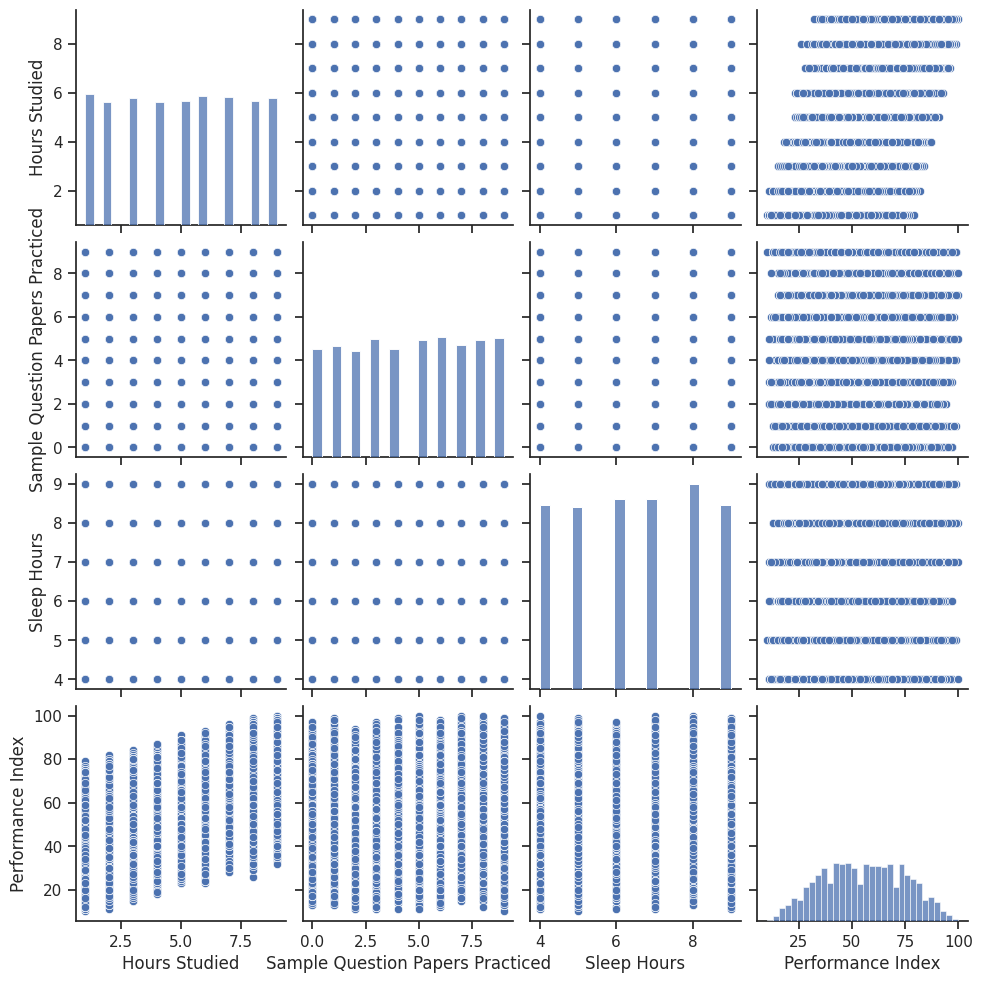

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Set the style of the plot
sns.set(style="ticks")

# Select the columns for the pair plot
columns_to_plot = ['Hours Studied', 'Sample Question Papers Practiced', 'Sleep Hours', 'Performance Index']

# Create a pair plot
sns.pairplot(df[columns_to_plot])

# Add title and adjust figure size

plt.figure(figsize=(10, 8))

# Show the plot
plt.show()

 The above plot showcases the students performance based on the no.of hours studied, sample question papers practiced, and sleep hours .

# 3.Study the correlation between previous scores and current performance.

In [ ]:
correlation_previous = df['Previous Scores'].corr(df['Performance Index'])
print("Correlation between previous scores and performance:", correlation_previous)


Correlation between previous scores and performance: 0.9151891412264476


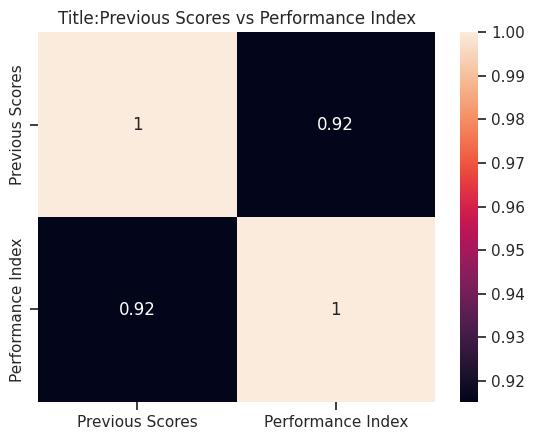

In [ ]:
correlation_matrix = df[[ 'Previous Scores', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Title:Previous Scores vs Performance Index')
plt.show()

The heatmap provides a visual representation of the correlation between 'Previous Scores' and 'Performance Index'. The color intensity in the heatmap cells indicates the strength and direction of the correlation. Positive correlations are indicated by warmer colors, while negative correlations are represented by cooler colors. The annotations inside the cells display the actual correlation coefficient values. This visualization can help you understand the relationship between these two variables in your dataset.

# 4.Explore the influence of participating in extracurricular activities on academic performance.

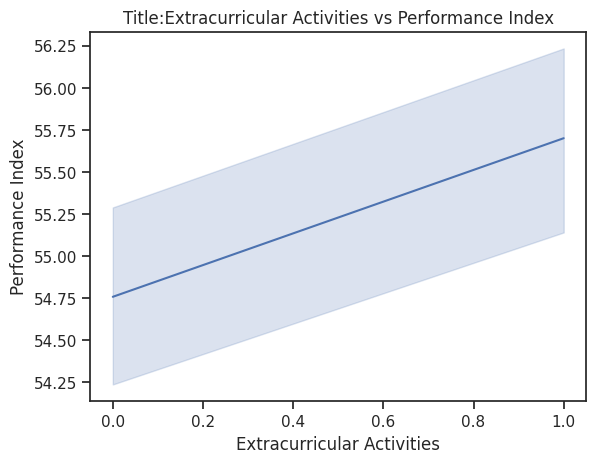

In [ ]:
sns.lineplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title('Title:Extracurricular Activities vs Performance Index')
plt.show()

The line plot provides insights into how the 'Extracurricular Activities' variable relates to the 'Performance Index' variable. Each data point represents an observation in the dataset, and the line connects these points to visualize trends or patterns. Depending on the nature of your data, the line might show an upward or downward trend, indicating how changes in extracurricular activities correspond to changes in the performance index.

# 5.Analyze the relationship between sleep hours and performance.


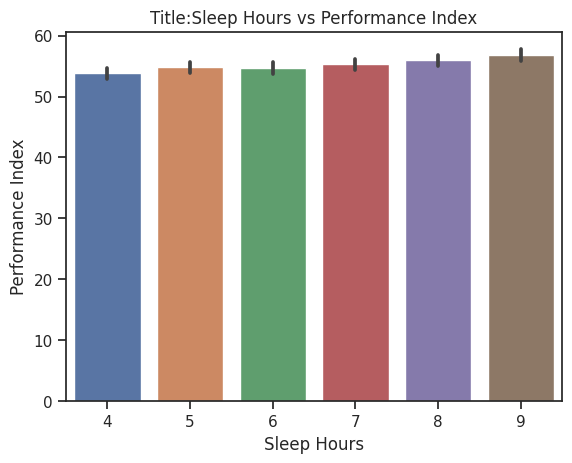

In [ ]:
sns.barplot(x='Sleep Hours', y='Performance Index', data=df)
sns.set(style='whitegrid')
plt.title('Title:Sleep Hours vs Performance Index')
plt.show()

The bar plot provides a visual representation of how different levels of 'Sleep Hours' relate to the 'Performance Index'. Each bar represents a category of 'Sleep Hours', and the height of the bar indicates the average 'Performance Index' for that category. This visualization can help you understand whether there is a correlation between sleep hours and performance index and whether certain sleep hour ranges are associated with higher or lower performance.

# 6.Identify correlations between different study-related variables and performance index.

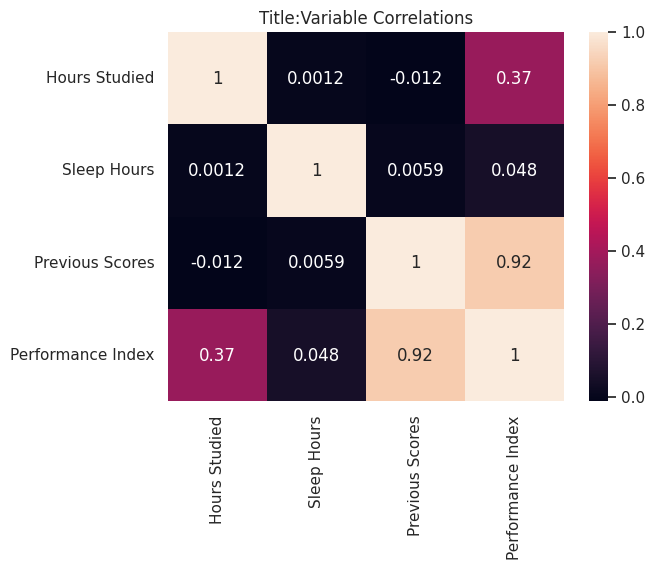

In [ ]:
correlation_matrix = df[['Hours Studied', 'Sleep Hours', 'Previous Scores', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Title:Variable Correlations')
plt.legend
plt.show()

By including multiple variables in the correlation matrix and heatmap, you can gain insights into how different variables are related to each other. This can help you understand potential interactions and dependencies between these variables in your dataset.

# 7.Compare the impact of different study habits on performance

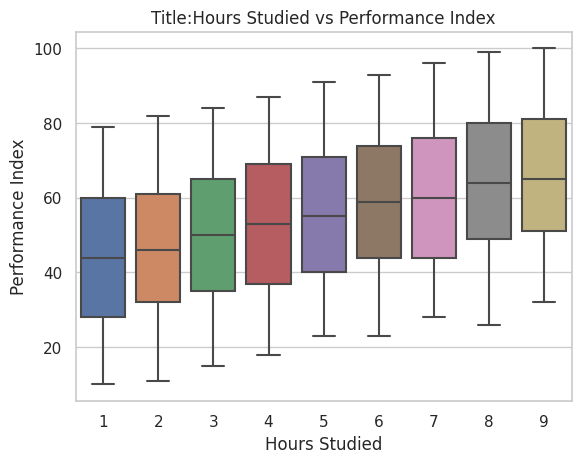

In [ ]:
sns.boxplot(x='Hours Studied', y='Performance Index', data=df)
plt.title('Title:Hours Studied vs Performance Index')
plt.show()

This visualization can help you understand the relationship between the number of hours studied and the performance index. You can identify if there are any trends in performance at different levels of study hours and if there are any potential outliers or variability in the data.






# 8.Use data visualization to present insights on study hours, sleep hours, and performance.


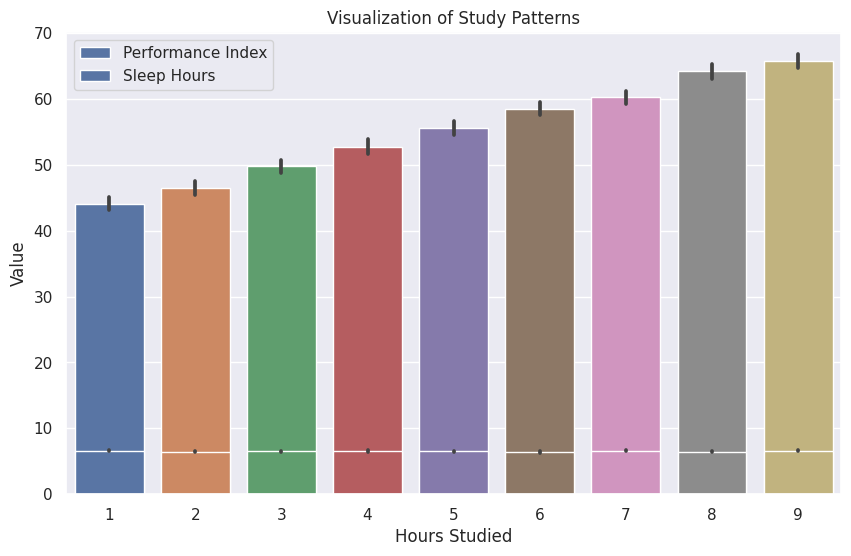

In [ ]:
sns.set(style="darkgrid")

# Plotting the line plots
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='Hours Studied', y='Performance Index', label='Performance Index')
sns.barplot(data=df, x='Hours Studied', y='Sleep Hours', label='Sleep Hours')

plt.title('Visualization of Study Patterns')
plt.xlabel('Hours Studied')
plt.ylabel('Value')
plt.legend()
plt.show()


The grouped bar plot allows you to visually compare the relationship between 'Hours Studied', 'Performance Index', and 'Sleep Hours' for different categories of 'Hours Studied'. Each pair of bars represents 'Performance Index' and 'Sleep Hours' for a specific level of study hours. This visualization can help you analyze how study patterns relate to both performance and sleep hours.

# 9.Segment students based on their study habits and performance patterns.

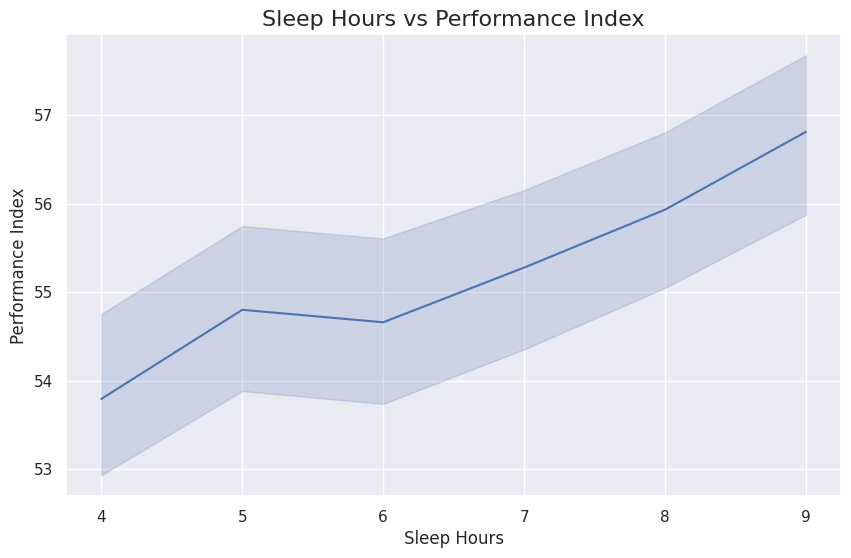

In [ ]:
# Set a Seaborn style
sns.set(style='darkgrid')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sleep Hours', y='Performance Index', data=df, )

# Add title and labels
plt.title('Sleep Hours vs Performance Index', fontsize=16)
plt.xlabel('Sleep Hours', fontsize=12)
plt.ylabel('Performance Index', fontsize=12)

# Show the plot
plt.show()


## 10. Determine which study habits and factors have the most significant impact on performance.

# importing necessary libraies from sklearn for applying Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Independent and Depenmdent Varibles

In [ ]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']


# Test_Train_Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor model

In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)

In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#feature_importance
feature_importances = random_forest_model.feature_importances_

In [ ]:
print("Feature Importances:", feature_importances)

Feature Importances: [1.41620886e-01 8.47007485e-01 7.10374079e-04 4.79269355e-03
 5.14406143e-03 7.24499979e-04]


# 11.Analyze trends in performance index over time or across different groups.

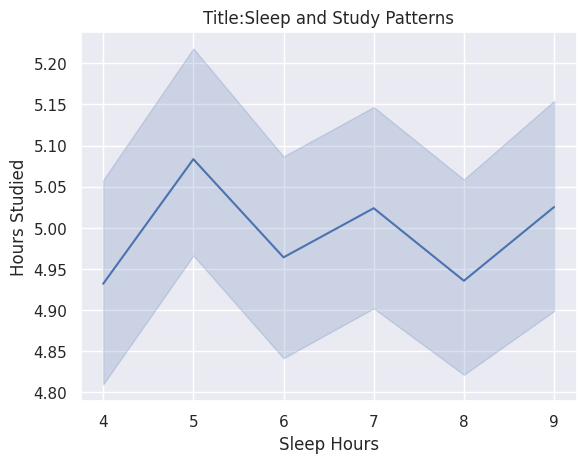

In [ ]:
sns.lineplot(x='Sleep Hours', y='Hours Studied', data=df)
plt.title('Title:Sleep and Study Patterns')
plt.show()


The line plot visualizes how 'Sleep Hours' and 'Hours Studied' relate to each other. Each data point represents an observation in the dataset, and the line connects these points to visualize trends or patterns. Depending on the data, you can see if there is any relationship between the two variables. For instance, you might observe that as 'Sleep Hours' increase, 'Hours Studied' also tends to increase, indicating a potential correlation between these two study patterns.

# 12.Study the relationship between sleep hours and study hours.

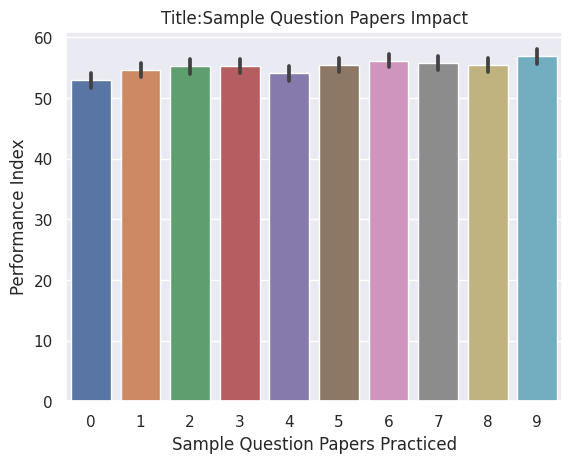

In [ ]:
sns.barplot(x='Sample Question Papers Practiced', y='Performance Index', data=df)
plt.title('Title:Sample Question Papers Impact')
plt.show()


The bar plot visualizes the impact of practicing sample question papers on the 'Performance Index'. Each bar represents a category of 'Sample Question Papers Practiced', and the height of the bar indicates the average 'Performance Index' for that category. This visualization can help you analyze whether practicing more sample question papers is associated with higher performance or if there are other patterns in the data.






# 15.Use models to predict the performance index for new students based on their attributes.

In [ ]:

X = df[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Sleep Hours']]
y = df['Performance Index']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest_model = RandomForestRegressor(random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("accuracy:", r2)

Mean Absolute Error: 1.845292237096237
accuracy: 0.9854928948838866


These metrics help assess the performance of the Random Forest Regressor model in predicting the 'Performance Index' based on the provided features. The lower the MAE and the closer the R2 score is to 1, the better the model's predictive performance.

# **SUMMARY:**

# In summary, our analysis highlights the importance of focused study habits, consistent performance history, balanced extracurricular engagement, and healthy sleep patterns in determining academic success. This understanding can guide educators and students in promoting effective learning strategies and achieving better outcomes.

